## Training Model

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
import random
import cv2
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score 
from PIL import Image   


In [2]:
def process_image(image_path):
    image1 = Image.open(image_path)
    
    # Langkah 1: Potong gambar
    width, height = image1.size
    x,y = 400,200
    cropped_image = image1.crop((x, y, width-300, height-100))

    # Langkah 2: Konversi ke grayscale
    gray_image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_BGR2GRAY)

    # Langkah 3: Thresholding
    thresholded_image = gray_image.copy()
    otsu_threshold, image_result = cv2.threshold(thresholded_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    threshold_value = 128
    thresholded_image[gray_image > threshold_value] = 255

    #plt.imshow(image_result, cmap='gray') 
    #plt.axis('off')
    #plt.show()

    return image_result

## Load and extract features

In [4]:
from skimage.io import imread 
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import joblib
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

Categories=['Bagus','Penyok'] 
flat_data_arr=[] #input array 
target_arr=[] #output array 
#path which contains all the categories of images 
datadir='Dataset V2/Random Forest/Training/' 
for i in Categories: 
      
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        #img_array=imread(os.path.join(path,img)) 
        img_process = process_image(os.path.join(path,img))
        img_resized=resize(img_process,(150,150,3))
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(Categories.index(i)) 
        #hog_features = extract_hog_features(img_process)
        #X.append(hog_features)
        #y.append(i)
    print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)


loading... category : Bagus
loaded category:Bagus successfully
loading... category : Penyok
loaded category:Penyok successfully


In [5]:
df=pd.DataFrame(flat_data)  
df['Target']=target 
df.shape
print (df)

#input data  
x=df.iloc[:,:-1]  
#output data 
y=df.iloc[:,-1]

# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1000, stratify=y) 

       0    1    2    3    4    5    6    7    8    9  ...  67491  67492  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

     67493  67494  67495  67496  67497  67498  67499  Target  
0      0.0    0.0    0.0

## Train Data

In [49]:
#N ESTIMATOR SAMA MAX DEPTH DIATUR LAGIII
# Define a function to train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=5)
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=1000)

The model is 100.0% accurate
              precision    recall  f1-score   support

 Botol Bagus       1.00      1.00      1.00        20
Botol Penyok       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion matrix, without normalization
[[20  0]
 [ 0 20]]


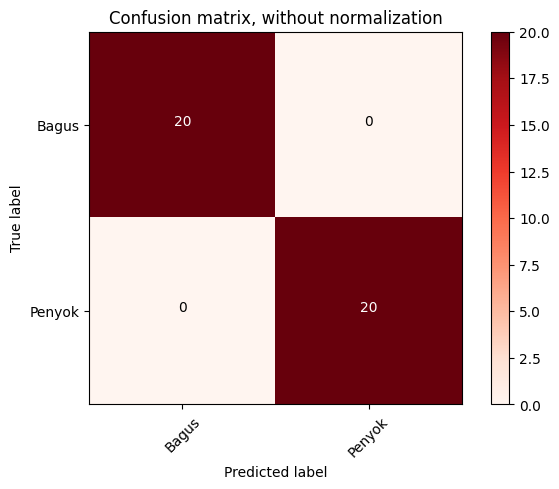

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

model_SVM = r'Version_2_Final_RF.pkl'

loaded_model = joblib.load(model_SVM)

# Testing the model using the testing data 
y_pred = loaded_model.predict(x_test) 
  
# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

Categories = ['Bagus','Penyok']

print(classification_report(y_test, y_pred, target_names=['Botol Bagus', 'Botol Penyok']))

cf = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cf, classes=Categories,title='Confusion matrix, without normalization')



## Learning Curve

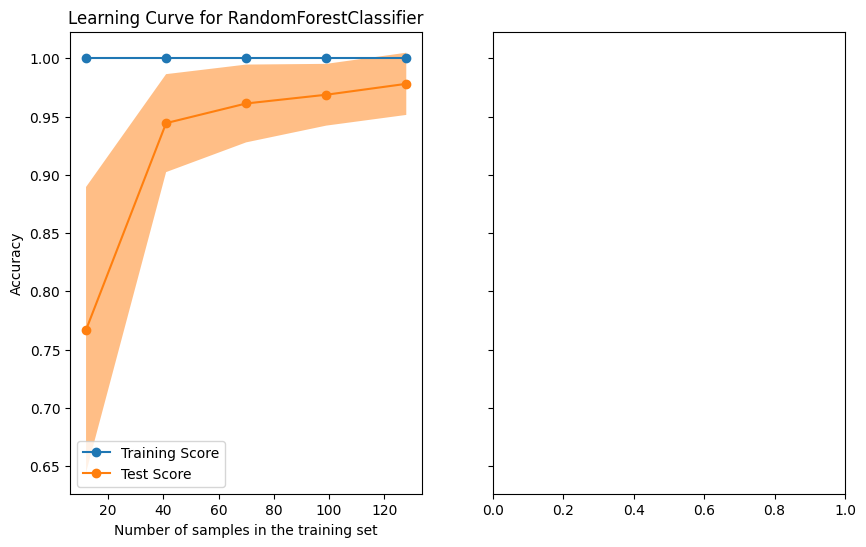

In [11]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

rf_classifier = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([rf_classifier]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

## Save Model

In [51]:
import joblib

# save the model to disk
filename = 'Final_RF.pkl'
joblib.dump(rf_classifier, filename)
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

1.0


## Predict Image from Loaded Model

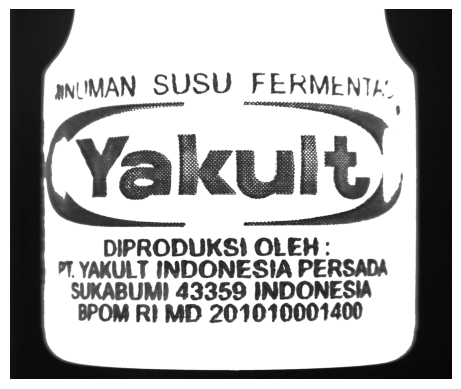

Bagus = 89.8%
Penyok = 10.2%
The predicted image is : Bagus


'No'

In [8]:
from PIL import Image
import cv2
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import joblib
import matplotlib.pyplot as plt 

def process_image(image_path):
    image1 = Image.open(image_path)

    # Langkah 1: Potong gambar
    width, height = image1.size
    x,y = 400,200
    cropped_image = image1.crop((x, y, width-300, height-100))

    # Langkah 2: Konversi ke grayscale
    gray_image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_BGR2GRAY)


    # Langkah 3: Thresholding
    thresholded_image = gray_image.copy()
    otsu_threshold, image_result = cv2.threshold(thresholded_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    threshold_value = 120
    thresholded_image[gray_image > threshold_value] = 255

    plt.imshow(thresholded_image, cmap='gray') 
    plt.axis('off')
    plt.show()

    return thresholded_image

def model_2(image):
# load the model from disk

    label = ['Bagus','Penyok'] 
    model_RF = r'Final_RF.pkl'

    loaded_model = joblib.load(model_RF)
    img=process_image(image)

    img_resize=resize(img,(150,150,3)) 
    l=[img_resize.flatten()] 
    probability_Array=loaded_model.predict_proba(l)
    probability=label[loaded_model.predict(l)[0]]
    for ind,val in enumerate(label): 
        print(f'{val} = {probability_Array[0][ind]*100}%') 
    if probability == "Penyok":
        kesimpulan = 'Yes' #Botol Lecet?
    else :
        kesimpulan = "No" #Botol Bagus?
    print("The predicted image is : "+label[loaded_model.predict(l)[0]])
    return kesimpulan

image_path = r'Dataset V2/Random Forest/Training/Bagus/WIN_20240425_13_59_08_Pro.jpg'
#image_path = r'Dataset V2/Testing/Bagus/ObjectChecked_20240512142704322603.png'
#image_path = r'Dataset V2/Random Forest/Testing/Lecet/WIN_20240401_19_48_04_Pro.jpg'

model_2(image_path)  
